# Week 36

## Exercise 1
**a)** 3 if this does not include the intercept. 

**b)** Too many degrees of freedom can lead to overfitting.

**c)** Too few degrees of freedom can lead to underfitting. 

**d)** $$ df(\lambda) = \sum_{j=1}^p \frac{\sigma_j^2}{\sigma_j^2 + \lambda} $$

**e)** If the parameter $ \lambda $ is large $df $ goes to zero. We can reduce our degrees of freedom without reducing the model. 

**f)** OLS can be easier to calculate.

## Exercise 2
Since $\frac{\partial}{\partial \beta_j} \left( \lambda \sum_{i=0}^{n-1} \beta_i^2 \right) = 2 \lambda \beta_j$

$$ \frac{\partial}{\partial \beta} \left( \left( \boldsymbol{y} -X\beta\right)^T\left( \boldsymbol{y} -X\beta\right) + \lambda \beta^T\beta \right) = 0 $$
$$ -2X^T\left( \boldsymbol{y} -  X\boldsymbol{\beta} \right) + 2 \lambda I \boldsymbol{\beta} = 0 $$
$$ \left( X^TX\boldsymbol{\beta} - X^T\boldsymbol{y} \right) + \lambda I \boldsymbol{\beta} =0$$
$$ X^TX \boldsymbol{\beta} + \lambda I \boldsymbol{\beta} - X^T y =0$$
$$ \left( X^TX + \lambda I \right) \boldsymbol{\beta} =X^T\boldsymbol{y}$$
$$ \hat{\beta} = \left( X^TX + \lambda I \right)^{-1} X^T \boldsymbol{y}$$

## Exercise 3


In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [44]:
n = 100
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1)

**a)**

In [46]:
def polynomial_features(x, p, intercept=False):
    n = len(x)
    if intercept:
        X = np.zeros((n, p + 1))
        X[:, 0] = 1.0
        for i in range(1,p+1):
            X[:, i] = x**i
    else:
        X = np.zeros((n, p))
        for i in range(1,p+1):
            X[:,i-1] = x**i
    return X

**b)**

In [48]:
X = polynomial_features(x, 3)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
x_train = X_train[:, 0] # These are used for plotting
x_test = X_test[:, 0] # These are used for plotting

**c)**

In [52]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)
y_offset = np.mean(y_train)

## Exercise 4
**a)**

In [54]:
def Ridge_parameters(X, y):
    # Assumes X is scaled and has no intercept column
    lmbda  = 0.01
    Id = n*lmbda* np.eye((X.T@X).shape[0])
    return np.linalg.inv(X.T @ X+Id) @ X.T @ y

beta = Ridge_parameters(X_train_s, y_train)

**b)**

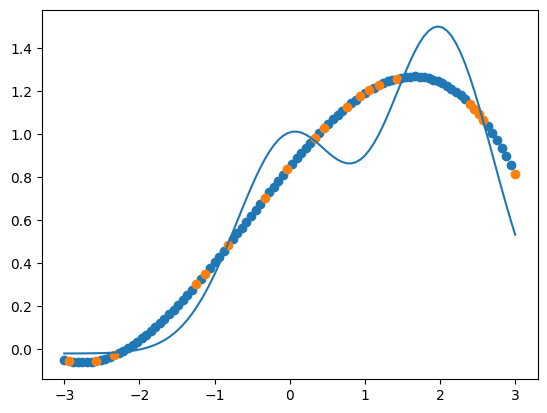

In [56]:
plt.plot(x, y)
plt.scatter(x_train, X_train_s @ beta + y_offset)
plt.scatter(x_test, X_test_s @ beta + y_offset)

## Exercise 5
**a)**

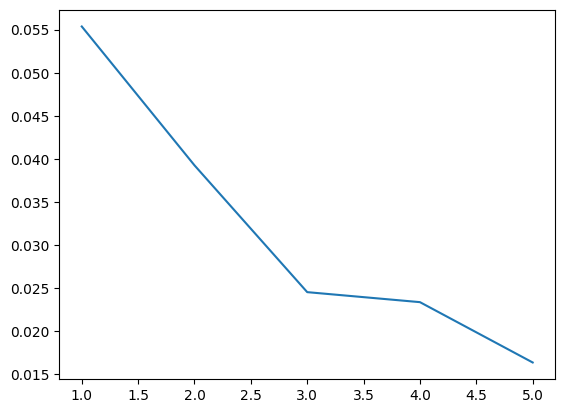

In [58]:
from sklearn.metrics import mean_squared_error

poldeg = range(1,6)
mse_ridge = []

for i in poldeg:
    X = polynomial_features(x, i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_s = scaler.transform(X_train)
    X_test_s = scaler.transform(X_test)
    y_offset = np.mean(y_train)
    beta = Ridge_parameters(X_train_s, y_train)
    mse = mean_squared_error(y_train, X_train_s @ beta + y_offset)
    mse_ridge.append(mse)

plt.plot(poldeg, mse_ridge)

**b)**

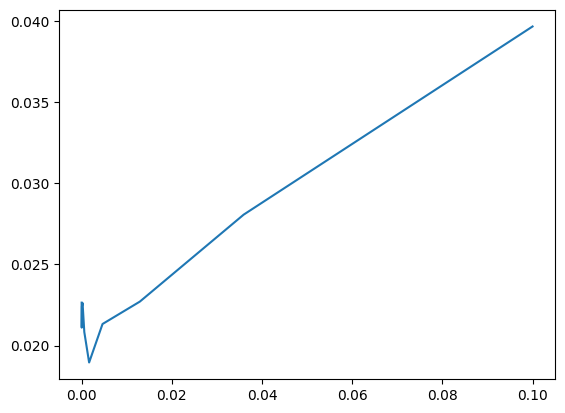

In [60]:
lambdas = np.logspace(-5, -1, 10)
mse_ridge = []

def Ridge_parameters(X, y, lmbda):
    # Assumes X is scaled and has no intercept column
    Id = n*lmbda* np.eye((X.T@X).shape[0])
    return np.linalg.inv(X.T @ X+Id) @ X.T @ y

for lmb in lambdas:
    X = polynomial_features(x, 3)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_s = scaler.transform(X_train)
    X_test_s = scaler.transform(X_test)
    y_offset = np.mean(y_train)
    beta = Ridge_parameters(X_train_s, y_train, lmb)
    mse = mean_squared_error(y_train, X_train_s @ beta + y_offset)
    mse_ridge.append(mse)

plt.plot(lambdas, mse_ridge)

**c)**

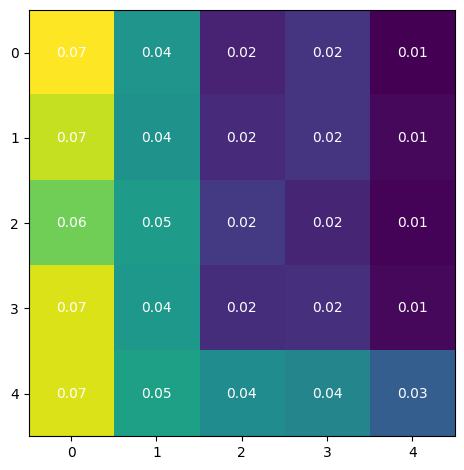

In [62]:
lambdas = np.logspace(-5, -1, 5)
mse_ridge = np.zeros((5,5))
poldeg = range(1,6)


def Ridge_parameters(X, y, lmbda):
    # Assumes X is scaled and has no intercept column
    Id = n*lmbda* np.eye((X.T@X).shape[0])
    return np.linalg.inv(X.T @ X+Id) @ X.T @ y

for i in range(len(lambdas)):
    for j in range(len(poldeg)):
        X = polynomial_features(x, j+1)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train_s = scaler.transform(X_train)
        X_test_s = scaler.transform(X_test)
        y_offset = np.mean(y_train)
        beta = Ridge_parameters(X_train_s, y_train, lambdas[i])
        mse = mean_squared_error(y_train, X_train_s @ beta + y_offset)
        mse_ridge[i,j] = mse

fig, ax = plt.subplots()
im = ax.imshow(mse_ridge)

for i in range(len(lambdas)):
    for j in range(len(poldeg)):
        text = ax.text(j,i, "{:.2f}".format(mse_ridge[i,j]), ha='center', va='center', color='w')


fig.tight_layout()
plt.show()